*ЗАДАНИЕ 2.1*

---
*Параметры без библиотек*

In [5]:
def mean(data):
    """Среднее арифметическое"""
    return sum(data) / len(data)

def median(data):
    """Медиана"""
    s = sorted(data)
    n = len(s)
    return (s[n//2 - 1] + s[n//2]) / 2 if n % 2 == 0 else s[n//2]

def mode(data):
    """Мода"""
    freq = {}
    for x in data:
        freq[x] = freq.get(x, 0) + 1
    max_freq = max(freq.values())
    return [k for k, v in freq.items() if v == max_freq]

def data_range(data):
    """Размах"""
    return max(data) - min(data)

def variance(data, sample=True):
    """Дисперсия"""
    m = mean(data)
    return sum((x - m) ** 2 for x in data) / (len(data) - sample)

def std_dev(data, sample=True):
    """Стандартное отклонение"""
    return variance(data, sample) ** 0.5

data = [1, 5, 2, 7, 1, 6, 3, 8, 5, 8, 1, 2]

print("Собственные реализации:")
print(f"Среднее: {mean(data):.4f}")
print(f"Медиана: {median(data)}")
print(f"Мода: {mode(data)}")
print(f"Размах: {data_range(data)}")
print(f"Дисперсия: {variance(data):.4f}")
print(f"Стандартное отклонение: {std_dev(data):.4f}")

Собственные реализации:
Среднее: 4.0833
Медиана: 4.0
Мода: [1]
Размах: 7
Дисперсия: 7.5379
Стандартное отклонение: 2.7455


**ЗАДАНИЕ 2.2**

---
*Параметры с библиотеками*

In [6]:
import statistics
import numpy as np
import pandas as pd
from scipy import stats

data = [1, 5, 2, 7, 1, 6, 3, 8, 5, 8, 1, 2]
data_np = np.array(data)
data_pd = pd.Series(data)

print("\nРасчет с использованием библиотек:")
print("\nstatistics:")
print(f"  mean: {statistics.mean(data):.4f}")
print(f"  median: {statistics.median(data)}")
print(f"  mode: {statistics.mode(data)}")
print(f"  pvariance: {statistics.pvariance(data):.4f}")
print(f"  variance: {statistics.variance(data):.4f}")
print(f"  pstdev: {statistics.pstdev(data):.4f}")
print(f"  stdev: {statistics.stdev(data):.4f}")

print("\nnumpy:")
print(f"  mean: {np.mean(data_np):.4f}")
print(f"  median: {np.median(data_np)}")
print(f"  std (ddof=1): {np.std(data_np, ddof=1):.4f}")
print(f"  var (ddof=1): {np.var(data_np, ddof=1):.4f}")
print(f"  ptp (размах): {np.ptp(data_np)}")

print("\nscipy.stats:")
print(f"  mode: {stats.mode(data_np, keepdims=True).mode[0]}")
print(f"  variation: {stats.variation(data_np):.4f}")

print("\npandas:")
print(f"  mean: {data_pd.mean():.4f}")
print(f"  median: {data_pd.median()}")
print(f"  mode: {data_pd.mode().values}")
print(f"  std: {data_pd.std():.4f}")
print(f"  var: {data_pd.var():.4f}")
print(f"  min-max range: {data_pd.max() - data_pd.min()}")


Расчет с использованием библиотек:

statistics:
  mean: 4.0833
  median: 4.0
  mode: 1
  pvariance: 6.9097
  variance: 7.5379
  pstdev: 2.6286
  stdev: 2.7455

numpy:
  mean: 4.0833
  median: 4.0
  std (ddof=1): 2.7455
  var (ddof=1): 7.5379
  ptp (размах): 7

scipy.stats:
  mode: 1
  variation: 0.6437

pandas:
  mean: 4.0833
  median: 4.0
  mode: [1]
  std: 2.7455
  var: 7.5379
  min-max range: 7


**ЗАДАНИЕ 3**

---
*Графики и данные основанные на датасете*

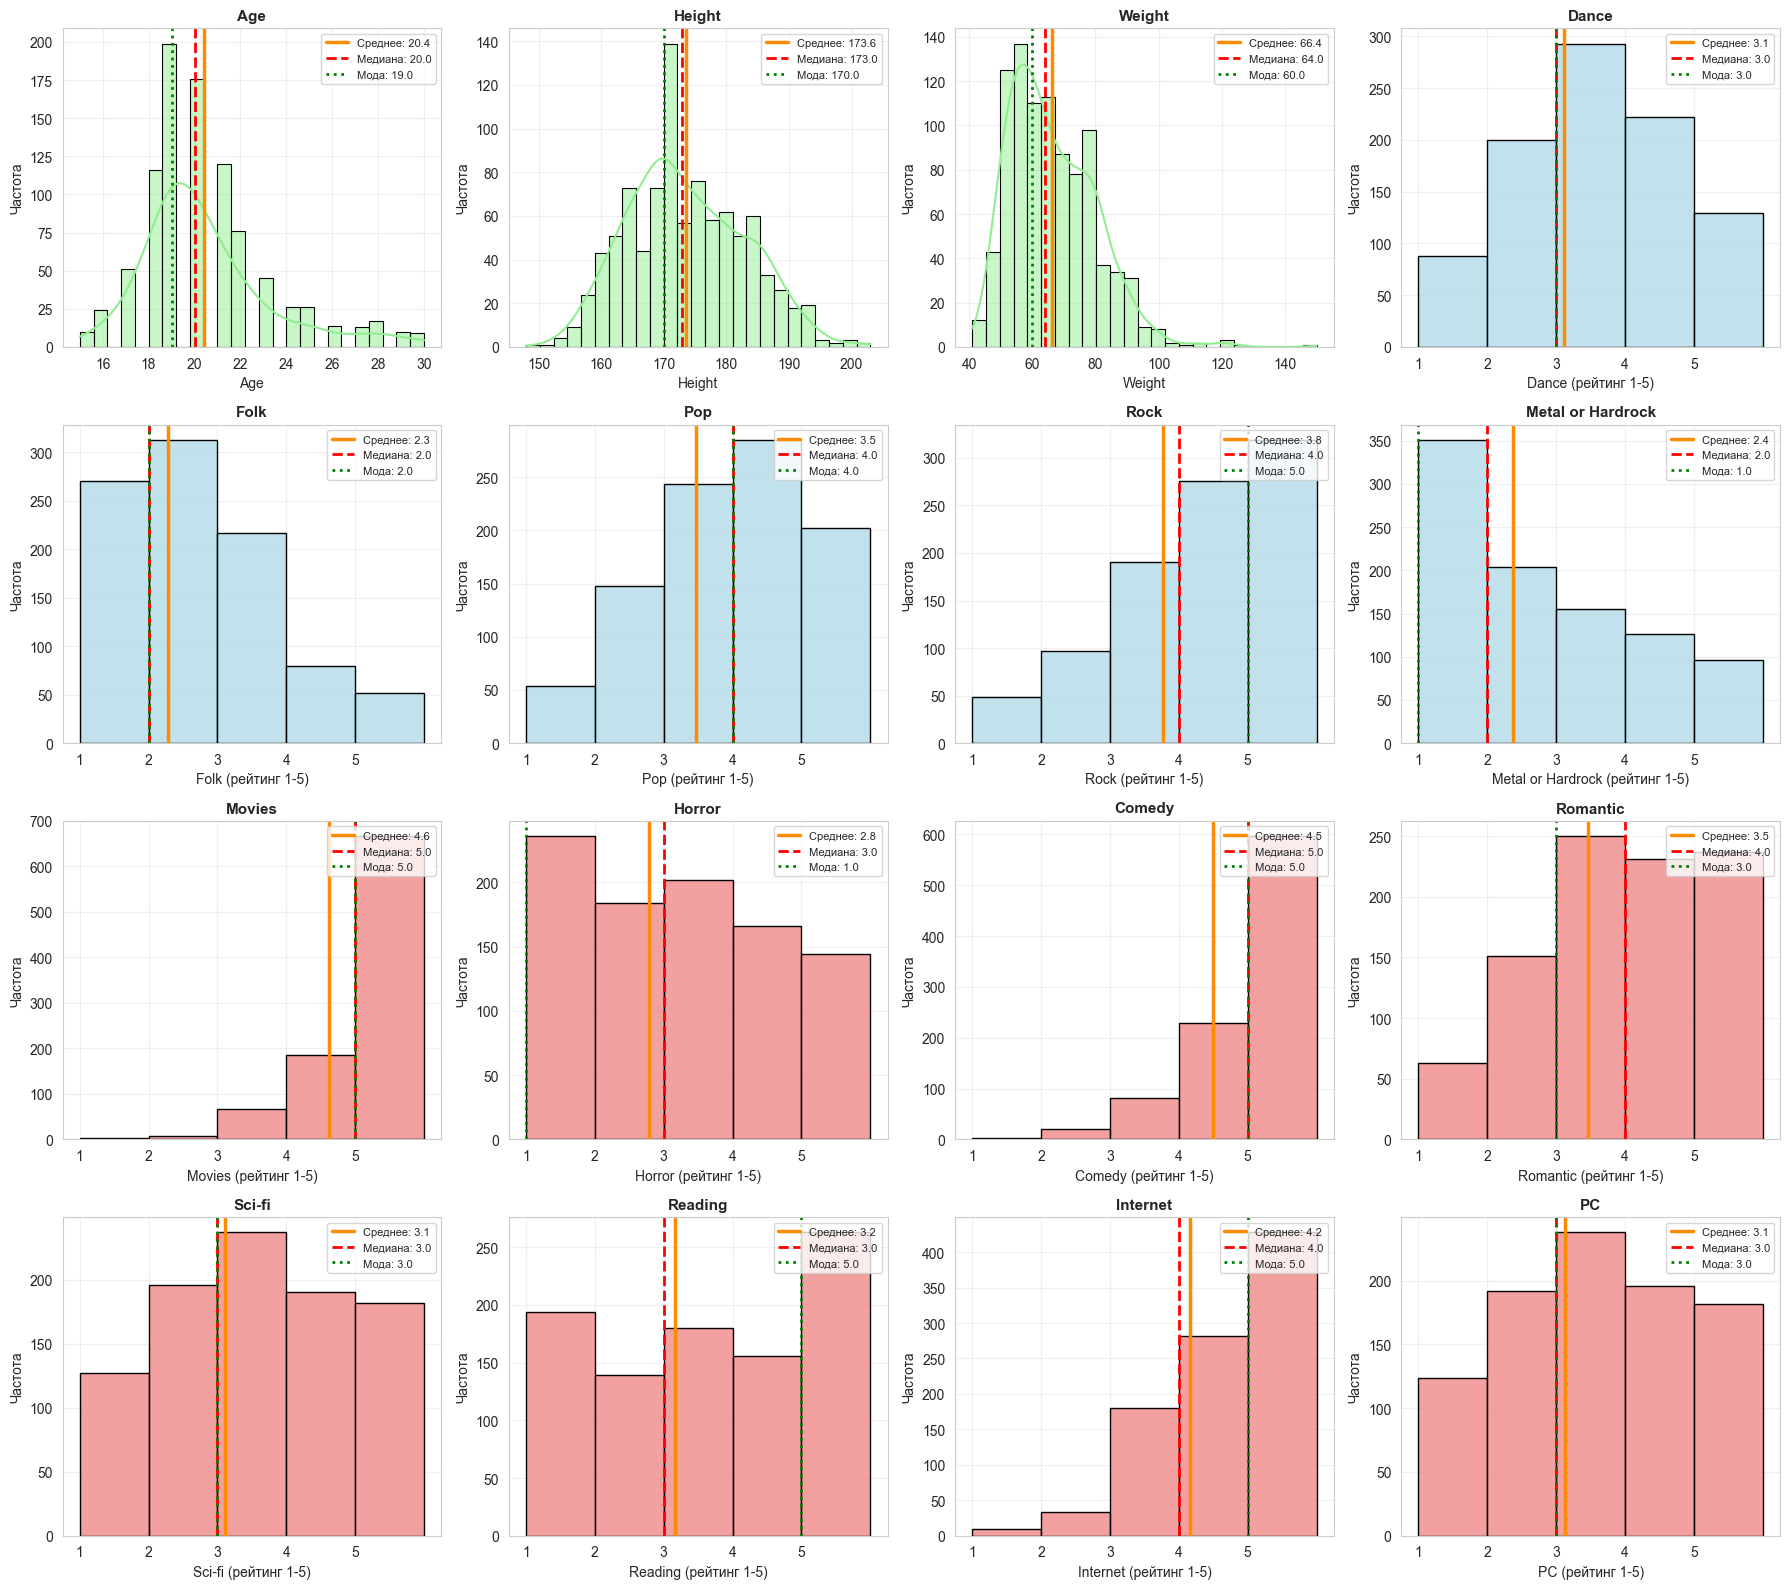


Статистический анализ опроса
Проанализировано респондентов: 932

Age:
  Среднее:          20.43
  Медиана:          20.00
  Мода:             19.00
  Минимум:          15.00
  Максимум:         30.00
  Стд.откл.:         2.82

Height:
  Среднее:         173.60
  Медиана:         173.00
  Мода:            170.00
  Минимум:         148.00
  Максимум:        203.00
  Стд.откл.:         9.36

Weight:
  Среднее:          66.37
  Медиана:          64.00
  Мода:             60.00
  Минимум:          41.00
  Максимум:        150.00
  Стд.откл.:        13.59

Dance:
  Среднее:           3.11
  Медиана:           3.00
  Мода:              3.00
  Минимум:           1.00
  Максимум:          5.00
  Стд.откл.:         1.17

Folk:
  Среднее:           2.28
  Медиана:           2.00
  Мода:              2.00
  Минимум:           1.00
  Максимум:          5.00
  Стд.откл.:         1.14

Pop:
  Среднее:           3.46
  Медиана:           4.00
  Мода:              4.00
  Минимум:           1.00
  Макс

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Загрузка данных
df = pd.read_csv('./csv/responses.csv') # <= Указать свой путь

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

selected_features = [
    'Age', 'Height', 'Weight',
    'Dance', 'Folk', 'Pop', 'Rock', 'Metal or Hardrock',
    'Movies', 'Horror', 'Comedy', 'Romantic', 'Sci-fi',
    'Reading', 'Internet', 'PC'
]

df_clean = df[selected_features].dropna()

df_clean = df_clean[
    (df_clean['Age'] >= 15) & (df_clean['Age'] <= 80) &
    (df_clean['Height'] >= 140) & (df_clean['Height'] <= 210) &
    (df_clean['Weight'] >= 40) & (df_clean['Weight'] <= 150)
]

fig, axes = plt.subplots(4, 4, figsize=(18, 16))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    if i >= len(axes):
        break

    ax = axes[i]
    data = df_clean[feature].dropna()

    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode().iloc[0] if not data.mode().empty else median_val

    if feature in ['Age', 'Height', 'Weight']:
        color = 'lightgreen'
        sns.histplot(data, kde=True, bins=25, ax=ax, color=color, edgecolor='black')
        ax.set_xlabel(f'{feature}')
    else:
        color = 'lightblue' if feature in ['Dance', 'Folk', 'Pop', 'Rock', 'Metal or Hardrock'] else 'lightcoral'
        sns.histplot(data, bins=range(1, 7), kde=False, ax=ax, color=color, edgecolor='black')
        ax.set_xticks(range(1, 6))
        ax.set_xlabel(f'{feature} (рейтинг 1-5)')

    ax.axvline(mean_val, color='darkorange', linestyle='-', linewidth=2.5, label=f'Среднее: {mean_val:.1f}')
    ax.axvline(median_val, color='red', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.1f}')
    ax.axvline(mode_val, color='green', linestyle=':', linewidth=2, label=f'Мода: {mode_val:.1f}')
    ax.legend(loc='upper right', fontsize=8)

    ax.set_title(f'{feature}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Частота')
    ax.grid(True, alpha=0.3)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('responses_histograms.png', dpi=150, bbox_inches='tight')
plt.show()

# Вывод
print(f"\nСтатистический анализ опроса")
print(f"Проанализировано респондентов: {len(df_clean)}\n")

for feature in selected_features:
    data = df_clean[feature].dropna()
    mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan

    print(f"{feature}:")
    print(f"  Среднее:   {data.mean():>12.2f}")
    print(f"  Медиана:   {data.median():>12.2f}")
    print(f"  Мода:      {mode_val:>12.2f}")
    print(f"  Минимум:   {data.min():>12.2f}")
    print(f"  Максимум:  {data.max():>12.2f}")
    print(f"  Стд.откл.: {data.std():>12.2f}\n")

print("\nДополнительная демографическая статистика:")
if 'Gender' in df.columns:
    print("\nРаспределение по полу:")
    print(df['Gender'].value_counts(dropna=True))

if 'Education' in df.columns:
    print("\nРаспределение по уровню образования:")
    print(df['Education'].value_counts(dropna=True).sort_index())